# Glider Data

Explore glider dive data 

In [59]:
from scipy.io import loadmat
import numpy as np
import xarray as xr

import glidertools as gt
import matplotlib.pylab as plt
from matplotlib.colors import BoundaryNorm

from cmocean import cm as cmo

import gsw

In [2]:
data_659 = '/Users/dhruvbalwada/work_root/sogos/data/interim/gliders/sg659/CTD_659.nc'
data_660 = '/Users/dhruvbalwada/work_root/sogos/data/interim/gliders/sg660/CTD_660.nc'

In [3]:
ds_659 = xr.load_dataset(data_659)
ds_660 = xr.load_dataset(data_660)

In [6]:
days = ds_659.time - np.datetime64('2019-01-01')
days_round_659 = (days / np.timedelta64(1, 'D')).round()

days = ds_660.time - np.datetime64('2019-01-01')
days_round_660 = (days / np.timedelta64(1, 'D')).round()

/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


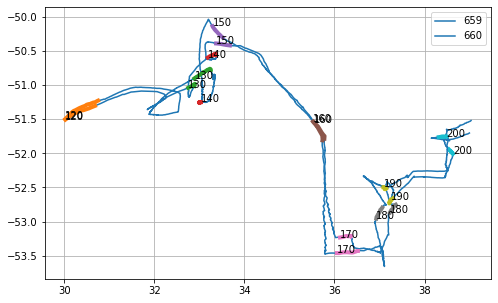

In [122]:
plt.figure(figsize = (8,5))

#plt.subplot(121)
plt.plot(ds_659.longitude, ds_659.latitude, label='659')

plt.legend()
days = np.linspace(120,200,9)
for i in days: 
    plt.plot(ds_659.longitude.where(days_round_659==i, drop=True), 
             ds_659.latitude.where(days_round_659==i, drop=True), linewidth=4)
    plt.text(ds_659.longitude.where(days_round_659==i, drop=True)[0], 
             ds_659.latitude.where(days_round_659==i, drop=True)[0], int(i))
    

#plt.subplot(122)
plt.plot(ds_660.longitude, ds_660.latitude, label='660')

plt.legend()
days = np.linspace(120,200,9)
for i in days: 
    plt.plot(ds_660.longitude.where(days_round_660==i, drop=True), 
             ds_660.latitude.where(days_round_660==i, drop=True), linewidth=4)
    plt.text(ds_660.longitude.where(days_round_660==i, drop=True)[0], 
             ds_660.latitude.where(days_round_660==i, drop=True)[0], int(i))    
    
plt.grid()

Text(0.5, 1, 'Temp Data 660')

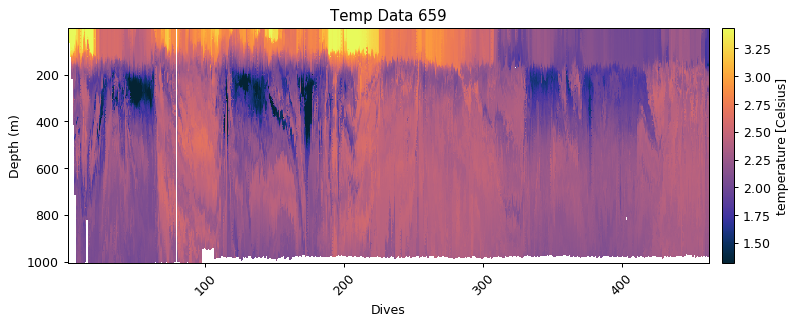

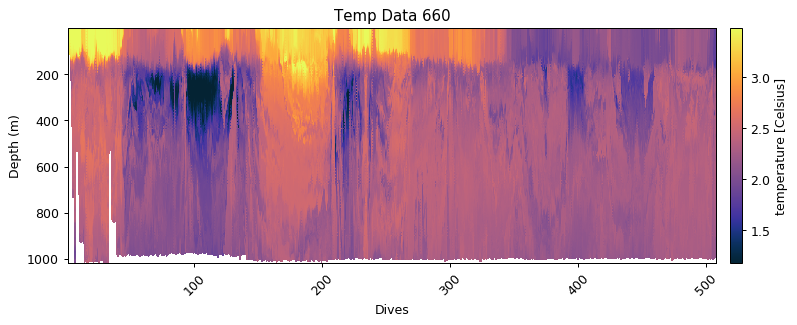

In [9]:
gt.plot(ds_659.dives, ds_659.pressure, ds_659.temperature, cmap=cmo.thermal, robust=True)
plt.title('Temp Data 659')

gt.plot(ds_660.dives, ds_660.pressure, ds_660.temperature, cmap=cmo.thermal, robust=True)
plt.title('Temp Data 660')

### Some plots in the straight region

In [8]:
dens_659 = gsw.sigma0(ds_659.salinity, ds_659.temperature)
dens_660 = gsw.sigma0(ds_660.salinity, ds_660.temperature)

In [9]:
ds_659['density'] = xr.DataArray(
            data=dens_659,
            coords=ds_659.coords,
            dims=ds_659.dims,
            name='density'
        )

ds_660['density'] = xr.DataArray(
            data=dens_660,
            coords=ds_660.coords,
            dims=ds_660.dims,
            name='density'
        )

Text(0.5, 1, 'Temp Data 660')

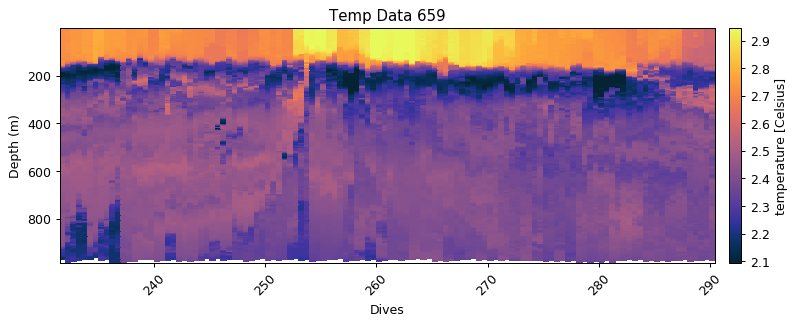

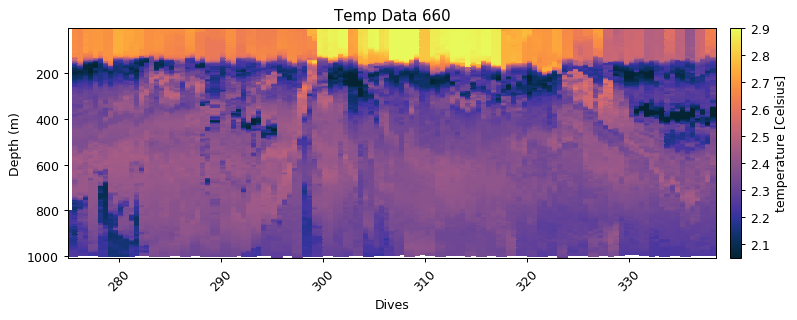

In [51]:
gt.plot(ds_659.dives.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.pressure.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.temperature.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 659')

gt.plot(ds_660.dives.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.pressure.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.temperature.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 660')

Text(0.5, 1, 'Dens Data 660')

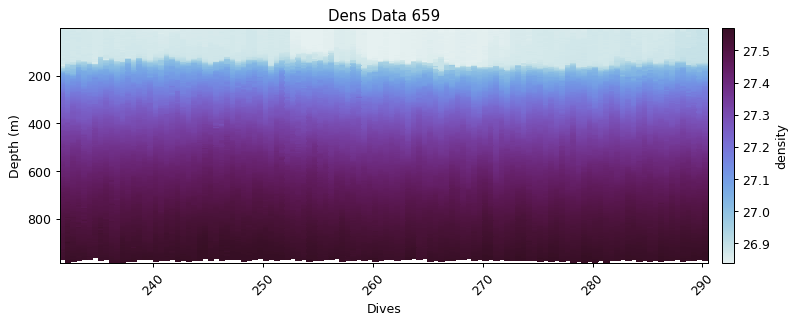

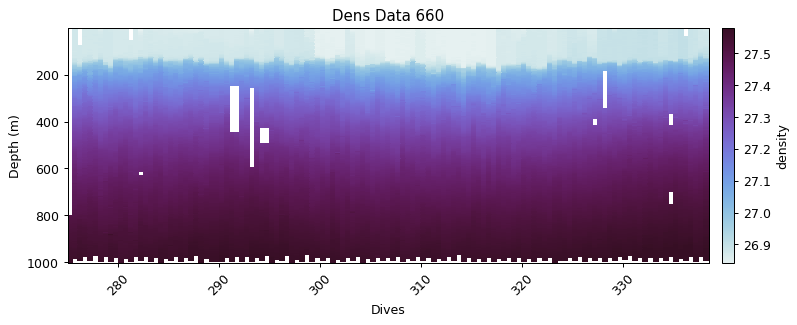

In [14]:
gt.plot(ds_659.dives.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.pressure.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.density.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        cmap=cmo.dense, robust=True)
plt.title('Dens Data 659')

gt.plot(ds_660.dives.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.pressure.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.density.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        cmap=cmo.dense, robust=True)
plt.title('Dens Data 660')

In [10]:
# Find avg lon/latitude over a certain dive numbers
# added for ease of plotting
# 659
temp = np.zeros_like(ds_659.latitude)

temp = xr.DataArray(
            data=temp,
            coords=ds_659.coords,
            dims=ds_659.dims,
            name='density'
        )

latitude_dive = temp.groupby(ds_659.dives) + ds_659.latitude.groupby(ds_659.dives).mean()
latitude_dive=latitude_dive.rename('latitude_dive')
longitude_dive = temp.groupby(ds_659.dives) + ds_659.longitude.groupby(ds_659.dives).mean()
longitude_dive = longitude_dive.rename('longitude_dive')

ds_659 = xr.merge([ds_659.assign_coords(dives=ds_659.dives), 
          latitude_dive, longitude_dive ])

# 660
temp = np.zeros_like(ds_660.latitude)

temp = xr.DataArray(
            data=temp,
            coords=ds_660.coords,
            dims=ds_660.dims,
            name='density'
        )

latitude_dive = temp.groupby(ds_660.dives) + ds_660.latitude.groupby(ds_660.dives).mean()
latitude_dive=latitude_dive.rename('latitude_dive')
longitude_dive = temp.groupby(ds_660.dives) + ds_660.longitude.groupby(ds_660.dives).mean()
longitude_dive = longitude_dive.rename('longitude_dive')

ds_660 = xr.merge([ds_660.assign_coords(dives=ds_660.dives), 
          latitude_dive, longitude_dive ])

(-53.5, -51.5)

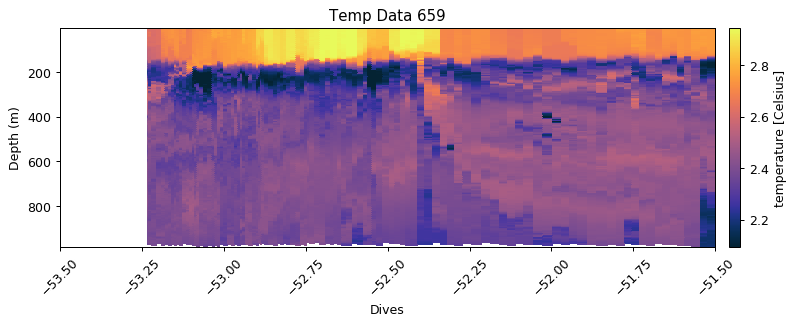

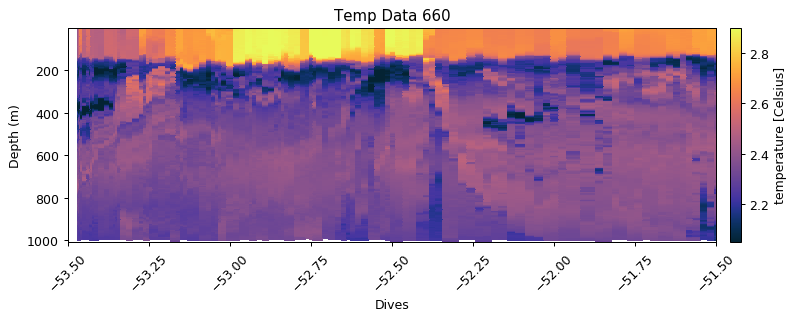

In [69]:
gt.plot(ds_659.latitude_dive.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.pressure.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.temperature.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 659')
plt.xlim([-53.5, - 51.5])

gt.plot(ds_660.latitude_dive.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.pressure.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.temperature.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 660')
plt.xlim([-53.5, - 51.5])


(-53.5, -51.5)

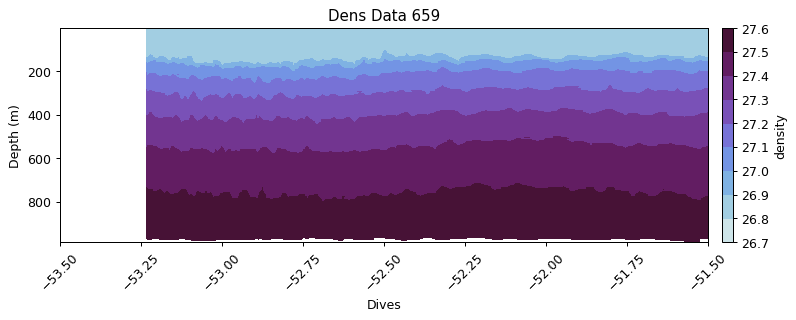

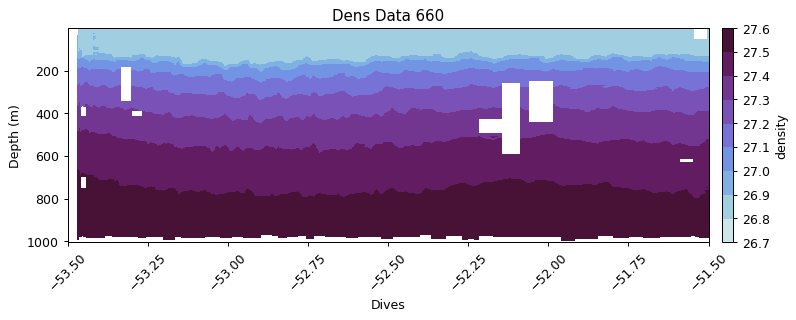

In [116]:
gt.plot.contourf(ds_659.latitude_dive.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.pressure.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.density.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        cmap=cmo.dense, levels=np.linspace(26.7, 27.6,10))
plt.title('Dens Data 659')
plt.xlim([-53.5, - 51.5])

gt.plot.contourf(ds_660.latitude_dive.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.pressure.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.density.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        cmap=cmo.dense, levels=np.linspace(26.7, 27.6,10))
plt.title('Dens Data 660')
plt.xlim([-53.5, - 51.5])


(500, 0)

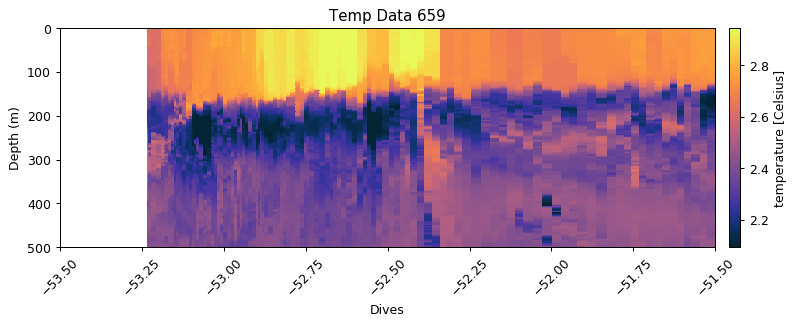

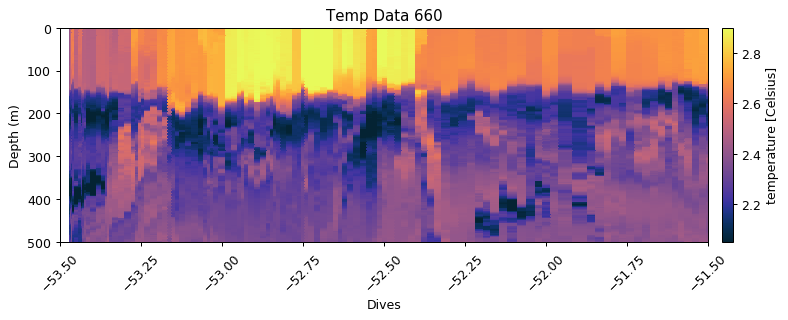

In [71]:
gt.plot(ds_659.latitude_dive.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.pressure.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        ds_659.temperature.where(np.logical_and(days_round_659<170, days_round_659>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 659')
plt.xlim([-53.5, - 51.5])
plt.ylim([500, 0])

gt.plot(ds_660.latitude_dive.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.pressure.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        ds_660.temperature.where(np.logical_and(days_round_660<170, days_round_660>158), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 660')
plt.xlim([-53.5, - 51.5])
plt.ylim([500, 0])


In [11]:
rho = ds_659.density.where(np.logical_and(ds_659.pressure>500, 
                                    ds_659.pressure<530), drop='True').groupby('dives').mean()
T = ds_659.time.where(np.logical_and(ds_659.pressure>500, 
                                    ds_659.pressure<530), drop='True').groupby('dives').mean()


In [13]:
rho = ds_659.density.where(( (ds_659.pressure>500) &
                                    (ds_659.pressure<530)), 
                           drop='True').groupby('dives').mean()

In [439]:
dT = (T[1:].values - T[0:-1].values)

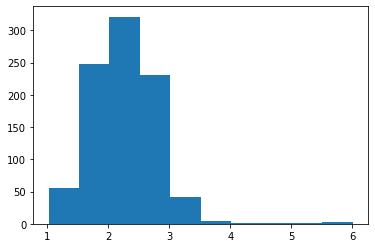

In [446]:
plt.hist(dT.astype('float')/1e9/3600);

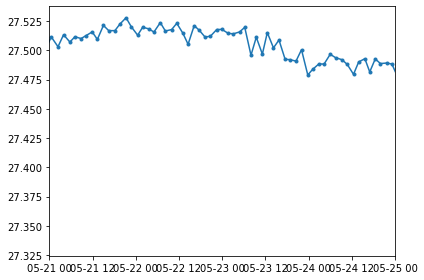

In [447]:
plt.plot(T, rho, '.-')
plt.xlim([np.datetime64('2019-05-21'), np.datetime64('2019-05-25')])
plt.tight_layout()

### Variograms 

Make variograms in horizontal and time direction. 

### 2D Variograms 

Look at 2D variograms at different depths, different regions and for different variables. 

In [52]:
def great_circle_distance(lon1, lat1, lon2, lat2):
    """Calculate the great circle distance between one or multiple pairs of
    points given in spherical coordinates. Spherical coordinates are expected
    in degrees. Angle definition follows standard longitude/latitude definition.
    This uses the arctan version of the great-circle distance function
    (en.wikipedia.org/wiki/Great-circle_distance) for increased
    numerical stability.
    Parameters
    ----------
    lon1: float scalar or numpy array
        Longitude coordinate(s) of the first element(s) of the point
        pair(s), given in degrees.
    lat1: float scalar or numpy array
        Latitude coordinate(s) of the first element(s) of the point
        pair(s), given in degrees.
    lon2: float scalar or numpy array
        Longitude coordinate(s) of the second element(s) of the point
        pair(s), given in degrees.
    lat2: float scalar or numpy array
        Latitude coordinate(s) of the second element(s) of the point
        pair(s), given in degrees.
    Calculation of distances follows numpy elementwise semantics, so if
    an array of length N is passed, all input parameters need to be
    arrays of length N or scalars.
    Returns
    -------
    distance: float scalar or numpy array
        The great circle distance(s) (in degrees) between the
        given pair(s) of points.
    """
    # Convert to radians:
    lat1 = np.array(lat1) * np.pi / 180.0
    lat2 = np.array(lat2) * np.pi / 180.0
    dlon = (lon1 - lon2) * np.pi / 180.0

    # Evaluate trigonometric functions that need to be evaluated more
    # than once:
    c1 = np.cos(lat1)
    s1 = np.sin(lat1)
    c2 = np.cos(lat2)
    s2 = np.sin(lat2)
    cd = np.cos(dlon)

    # This uses the arctan version of the great-circle distance function
    # from en.wikipedia.org/wiki/Great-circle_distance for increased
    # numerical stability.
    # Formula can be obtained from [2] combining eqns. (14)-(16)
    # for spherical geometry (f=0).

    return (
        180.0
        / np.pi
        * np.arctan2(
            np.sqrt((c2 * np.sin(dlon)) ** 2 + (c1 * s2 - s1 * c2 * cd) ** 2),
            s1 * s2 + c1 * c2 * cd,
        )
    )

In [66]:
# Function to select data from a specific region.
def select_data(ds_glid, var, Z1, Z2, lon1, lon2, lat1, lat2): 
    
    lat = ds_glid.latitude.where( ( (ds_glid.pressure>Z1) & 
                                    (ds_glid.pressure<Z2) &
                                    (ds_glid.longitude<lon1) &
                                    (ds_glid.longitude>lon2) &
                                    (ds_glid.latitude<lat1) & 
                                    (ds_glid.latitude>lat2) ), 
                                 drop=True).groupby('dives').mean()
    
    lon = ds_glid.longitude.where( ( (ds_glid.pressure>Z1) & 
                                    (ds_glid.pressure<Z2) &
                                    (ds_glid.longitude<lon1) &
                                    (ds_glid.longitude>lon2) &
                                    (ds_glid.latitude<lat1) & 
                                    (ds_glid.latitude>lat2) ), 
                                 drop=True).groupby('dives').mean()
    
    time = ds_glid.time.where( ( (ds_glid.pressure>Z1) & 
                                    (ds_glid.pressure<Z2) &
                                    (ds_glid.longitude<lon1) &
                                    (ds_glid.longitude>lon2) &
                                    (ds_glid.latitude<lat1) & 
                                    (ds_glid.latitude>lat2) ), 
                                 drop=True).groupby('dives').mean()
    
    var_sel = ds_glid[var].where( ( (ds_glid.pressure>Z1) & 
                                    (ds_glid.pressure<Z2) &
                                    (ds_glid.longitude<lon1) &
                                    (ds_glid.longitude>lon2) &
                                    (ds_glid.latitude<lat1) & 
                                    (ds_glid.latitude>lat2) ), 
                                 drop=True).groupby('dives').mean()
    
    return [time, lat, lon, var_sel]


def variogram_2D(glider_dict, var, 
                 Z1, Z2, lon1, lon2, lat1, lat2):
    """
    # Function to estimate the variogram from the data 
    # inputs: variable, region X, region z to avg over
    # assume temporally stationary,
    # ouputs: 2D variogram, nsamples per bin

    Inputs: 
        - glider_dict: Dictionary containing all the different glider
        datasets, we will cycle through this.
        - var: variable for which the variogram will be produced. 
        - Z1, ... lat2: regions over which we will do the estimation.
    """
    
    time = np.array([], dtype='datetime64[ns]')
    lat = np.array([])
    lon = np.array([])
    var_sel = np.array([])
    
    for key in glider_dict.keys():
        
        [time_ind, lat_ind, lon_ind, var_sel_ind] = select_data(glider_dict[key], var,
                                               Z1, Z2, lon1, lon2, lat1, lat2)
        
        time = np.concatenate([time, time_ind])
        lat = np.concatenate([lat, lat_ind])
        lon = np.concatenate([lon, lon_ind])
        var_sel = np.concatenate([var_sel, var_sel_ind])
        
    
    x1, x2 = np.meshgrid(lon, lon, sparse=True)
    y1, y2 = np.meshgrid(lat, lat, sparse=True)
    t1, t2 = np.meshgrid(time, time, sparse=True)
    var1, var2 = np.meshgrid(var_sel, var_sel, sparse=True)
    
    
    dX = great_circle_distance(x1, y1, x2, y2)
    dt = np.abs(t1 - t2)
    dVar2 = (var1 - var2)**2
        
        
    # remove repetitions on the other side of the matrices
    indices = np.indices(dX.shape)
    dX = dX[(indices[0,:,:] > indices[1,:,:])]*110 # convert to km
    dt = (dt[(indices[0,:,:] > indices[1,:,:])]).astype('float')/1e9/3600 # convert to hours
    dVar2 = dVar2[(indices[0,:,:] > indices[1,:,:])]
    
    # can be automated late
    Xbins = np.logspace(-2, 3, 51) # 10m to 1000km
    Tbins = np.logspace(-3, 4, 41) # 
    
    variogram_var_2D = np.nan*np.ones((len(Xbins)-1,len(Tbins)-1))
    nsamples_2D = np.nan*np.ones((len(Xbins)-1,len(Tbins)-1))
    
    for i in range(len(Xbins)-1):
        for j in range(len(Tbins)-1):
            
            nsamples_2D[i,j] = dX[(dX>=Xbins[i]) & (dX<Xbins[i+1]) &  
                                      (dt>=Tbins[j]) & (dt<Tbins[j+1])].size
            
            variogram_var_2D[i,j] = np.nanmean(dVar2[(dX>=Xbins[i]) & (dX<Xbins[i+1])
                                                 &  (dt>=Tbins[j]) 
                                                & (dt<Tbins[j+1])])
    
    Xaxis = 0.5*(Xbins[0:-1] + Xbins[1:])
    Taxis = 0.5*(Tbins[0:-1] + Tbins[1:])
    
    return [Xaxis, Taxis, nsamples_2D, variogram_var_2D]


In [55]:
glider_dict = {'659': ds_659, '660': ds_660}

In [72]:
lon1 = 40; 
lon2 = 28; 

In [126]:
# temp 

[Xaxis, Taxis, nsamples_2D_temp_N_shallow, variogram_2D_temp_N_shallow] = variogram_2D(glider_dict, 'temperature', 
                                                 20, 70, lon1, lon2, -50, -51.5)
[Xaxis, Taxis, nsamples_2D_temp_N_deep, variogram_2D_temp_N_deep] = variogram_2D(glider_dict, 'temperature', 
                                                 500, 550, lon1, lon2, -50, -51.5)

[Xaxis, Taxis, nsamples_2D_temp_S_shallow, variogram_2D_temp_S_shallow] = variogram_2D(glider_dict, 'temperature', 
                                                 20, 70, lon1, lon2, -51.5, -55)
[Xaxis, Taxis, nsamples_2D_temp_S_deep, variogram_2D_temp_S_deep] = variogram_2D(glider_dict, 'temperature', 
                                                 500, 550, lon1, lon2, -51.5, -55)

# Density
[Xaxis, Taxis, nsamples_2D_dens_N_shallow, variogram_2D_dens_N_shallow] = variogram_2D(glider_dict, 'density', 
                                                 20, 70, lon1, lon2, -50, -51.5)
[Xaxis, Taxis, nsamples_2D_dens_N_deep, variogram_2D_dens_N_deep] = variogram_2D(glider_dict, 'density', 
                                                 500, 550, lon1, lon2, -50, -51.5)

[Xaxis, Taxis, nsamples_2D_dens_S_shallow, variogram_2D_dens_S_shallow] = variogram_2D(glider_dict, 'density', 
                                                 20, 70, lon1, lon2, -51.5, -55)
[Xaxis, Taxis, nsamples_2D_dens_S_deep, variogram_2D_dens_S_deep] = variogram_2D(glider_dict, 'density', 
                                                 500, 550, lon1, lon2, -51.5, -55)

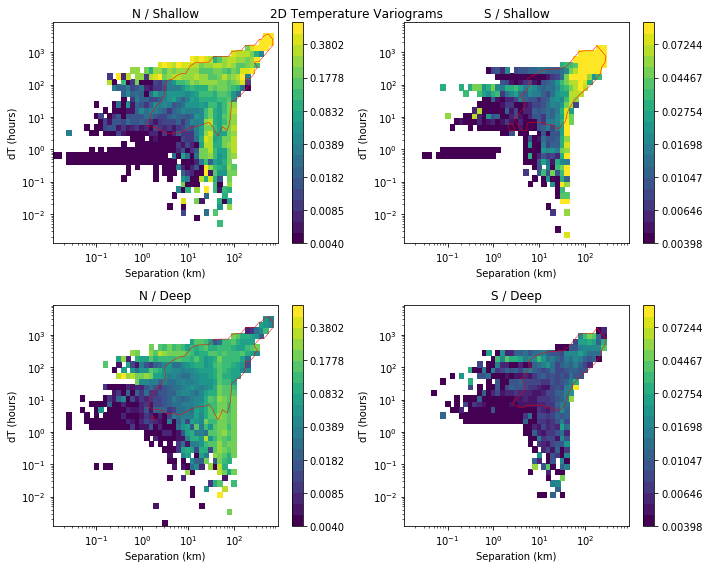

In [84]:
# temp plots 
plt.figure(figsize=(10,8))

levels_T_N = np.logspace(-2.4,-0.2,21)
levels_T_S = np.logspace(-2.4,-1,21)
cmap = plt.get_cmap('viridis')
norm_N = BoundaryNorm(levels_T_N, ncolors=cmap.N, clip=True)
norm_S = BoundaryNorm(levels_T_S, ncolors=cmap.N, clip=True)

plt.subplot(221)



plt.pcolormesh(Xaxis, Taxis, (variogram_2D_temp_N_shallow).T, 
               cmap=cmap, norm=norm_N)

plt.colorbar()
plt.contour(Xaxis, Taxis, nsamples_2D_temp_N_shallow.T, levels=[100], colors='r',
           linewidths=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (km)')
plt.ylabel('dT (hours)')
plt.title('N / Shallow')

plt.subplot(222)

plt.pcolormesh(Xaxis, Taxis, (variogram_2D_temp_S_shallow).T,
              cmap=cmap, norm=norm_S)

plt.colorbar()
plt.contour(Xaxis, Taxis, nsamples_2D_temp_S_shallow.T, levels=[100], colors='r',
           linewidths=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (km)')
plt.ylabel('dT (hours)')
plt.title('S / Shallow')


plt.subplot(223)

plt.pcolormesh(Xaxis, Taxis, (variogram_2D_temp_N_deep).T, 
               cmap=cmap, norm=norm_N)

plt.colorbar()
plt.contour(Xaxis, Taxis, nsamples_2D_temp_N_deep.T, levels=[100], colors='r',
           linewidths=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (km)')
plt.ylabel('dT (hours)')
plt.title('N / Deep')

plt.subplot(224)

plt.pcolormesh(Xaxis, Taxis, (variogram_2D_temp_S_deep).T,
              cmap=cmap, norm=norm_S)

plt.colorbar()
plt.contour(Xaxis, Taxis, nsamples_2D_temp_S_deep.T, levels=[100], colors='r',
           linewidths=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (km)')
plt.ylabel('dT (hours)')
plt.title('S / Deep')


plt.suptitle('2D Temperature Variograms')
plt.tight_layout()

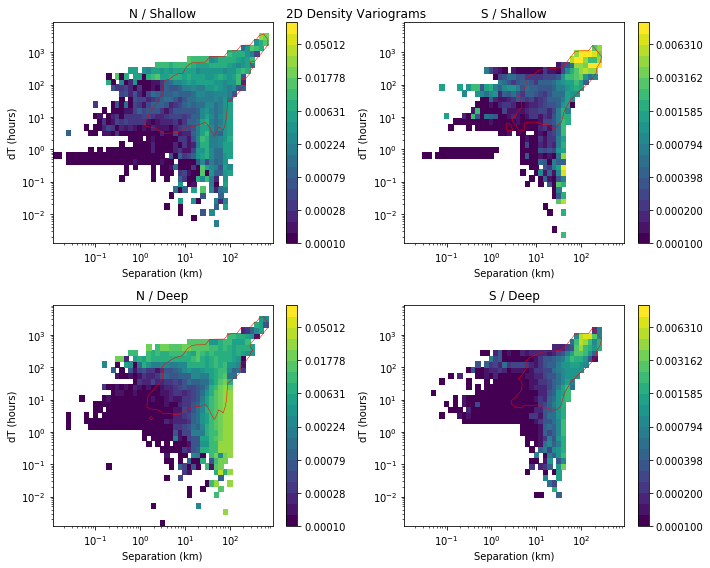

In [85]:
# density plots
# temp plots 
plt.figure(figsize=(10,8))

levels_dens_N = np.logspace(-4,-1,21)
levels_dens_S = np.logspace(-4,-2,21)

cmap = plt.get_cmap('viridis')
norm_N = BoundaryNorm(levels_dens_N, ncolors=cmap.N, clip=True)
norm_S = BoundaryNorm(levels_dens_S, ncolors=cmap.N, clip=True)

plt.subplot(221)

plt.pcolormesh(Xaxis, Taxis, (variogram_2D_dens_N_shallow).T, 
               cmap=cmap, norm=norm_N)

plt.colorbar()
plt.contour(Xaxis, Taxis, nsamples_2D_dens_N_shallow.T, levels=[100], colors='r',
           linewidths=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (km)')
plt.ylabel('dT (hours)')
plt.title('N / Shallow')

plt.subplot(222)

plt.pcolormesh(Xaxis, Taxis, (variogram_2D_dens_S_shallow).T,
              cmap=cmap, norm=norm_S)

plt.colorbar()
plt.contour(Xaxis, Taxis, nsamples_2D_dens_S_shallow.T, levels=[100], colors='r',
           linewidths=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (km)')
plt.ylabel('dT (hours)')
plt.title('S / Shallow')


plt.subplot(223)

plt.pcolormesh(Xaxis, Taxis, (variogram_2D_dens_N_deep).T, 
               cmap=cmap, norm=norm_N)

plt.colorbar()
plt.contour(Xaxis, Taxis, nsamples_2D_dens_N_deep.T, levels=[100], colors='r',
           linewidths=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (km)')
plt.ylabel('dT (hours)')
plt.title('N / Deep')

plt.subplot(224)

plt.pcolormesh(Xaxis, Taxis, (variogram_2D_dens_S_deep).T,
              cmap=cmap, norm=norm_S)

plt.colorbar()
plt.contour(Xaxis, Taxis, nsamples_2D_dens_S_deep.T, levels=[100], colors='r',
           linewidths=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (km)')
plt.ylabel('dT (hours)')
plt.title('S / Deep')


plt.suptitle('2D Density Variograms')
plt.tight_layout()

### 1D Variograms 

Look at 1D variograms at different depths, different regions and for different variables. 

In [98]:
def variogram_1D_space(glider_dict, var, tscale1, tscale2,
                 Z1, Z2, lon1, lon2, lat1, lat2):
    """
    # Function to estimate the variogram from the data 
    # inputs: variable, region X, region z to avg over
    # assume temporally stationary,
    # ouputs: 1D variogram, nsamples per bin

    Inputs: 
        - glider_dict: Dictionary containing all the different glider
        datasets, we will cycle through this.
        - var: variable for which the variogram will be produced. 
        - tscale1, tscale2: what timescales to average over
        - Z1, ... lat2: regions over which we will do the estimation.
    """
    
    time = np.array([], dtype='datetime64[ns]')
    lat = np.array([])
    lon = np.array([])
    var_sel = np.array([])
    
    for key in glider_dict.keys():
        
        [time_ind, lat_ind, lon_ind, var_sel_ind] = select_data(glider_dict[key], var,
                                               Z1, Z2, lon1, lon2, lat1, lat2)
        
        time = np.concatenate([time, time_ind])
        lat = np.concatenate([lat, lat_ind])
        lon = np.concatenate([lon, lon_ind])
        var_sel = np.concatenate([var_sel, var_sel_ind])
        
    
    x1, x2 = np.meshgrid(lon, lon, sparse=True)
    y1, y2 = np.meshgrid(lat, lat, sparse=True)
    t1, t2 = np.meshgrid(time, time, sparse=True)
    var1, var2 = np.meshgrid(var_sel, var_sel, sparse=True)
    
    
    dX = great_circle_distance(x1, y1, x2, y2)
    dt = np.abs(t1 - t2)
    dVar2 = (var1 - var2)**2
        
        
    # remove repetitions on the other side of the matrices
    indices = np.indices(dX.shape)
    dX = dX[(indices[0,:,:] > indices[1,:,:])]*110 # convert to km
    dt = (dt[(indices[0,:,:] > indices[1,:,:])]).astype('float')/1e9/3600 # convert to hours
    dVar2 = dVar2[(indices[0,:,:] > indices[1,:,:])]
    
    # can be automated late
    Xbins = np.logspace(-2, 3, 51) # 10m to 1000km
    
    
    variogram_var_1D = np.nan*np.ones((len(Xbins)-1,1))
    nsamples_1D = np.nan*np.ones((len(Xbins)-1,1))
    
    for i in range(len(Xbins)-1):
            
            nsamples_1D[i] = dX[(dX>=Xbins[i]) & (dX<Xbins[i+1]) &  (dt>=tscale1) & (dt<tscale2)].size
            
            variogram_var_1D[i] = np.nanmean(dVar2[(dX>=Xbins[i]) & (dX<Xbins[i+1]) &  (dt>=tscale1) & (dt<tscale2)])
    
    Xaxis = 0.5*(Xbins[0:-1] + Xbins[1:])
    
    return [Xaxis, nsamples_1D, variogram_var_1D]


In [124]:
# temp 

[Xaxis, nsamples_1D_temp_N_shallow, variogram_1D_temp_N_shallow] = variogram_1D_space(glider_dict, 'temperature', 
                                                 0,25, 20, 70, lon1, lon2, -50, -51.5)
[Xaxis, nsamples_1D_temp_N_deep, variogram_1D_temp_N_deep] = variogram_1D_space(glider_dict, 'temperature', 
                                                 0,25, 500, 550, lon1, lon2, -50, -51.5)

[Xaxis, nsamples_1D_temp_S_shallow, variogram_1D_temp_S_shallow] = variogram_1D_space(glider_dict, 'temperature', 
                                                 0,25, 20, 70, lon1, lon2, -51.5, -55)
[Xaxis, nsamples_1D_temp_S_deep, variogram_1D_temp_S_deep] = variogram_1D_space(glider_dict, 'temperature', 
                                                 0,25, 500, 550, lon1, lon2, -51.5, -55)
 


In [123]:
# density

[Xaxis, nsamples_1D_dens_N_shallow, variogram_1D_dens_N_shallow] = variogram_1D_space(glider_dict, 'density', 
                                                 0,25, 20, 70, lon1, lon2, -50, -51.5)
[Xaxis, nsamples_1D_dens_N_deep, variogram_1D_dens_N_deep] = variogram_1D_space(glider_dict, 'density', 
                                                 0,25, 500, 550, lon1, lon2, -50, -51.5)

[Xaxis, nsamples_1D_dens_S_shallow, variogram_1D_dens_S_shallow] = variogram_1D_space(glider_dict, 'density', 
                                                 0,25, 20, 70, lon1, lon2, -51.5, -55)
[Xaxis, nsamples_1D_dens_S_deep, variogram_1D_dens_S_deep] = variogram_1D_space(glider_dict, 'density', 
                                                 0,25, 500, 550, lon1, lon2, -51.5, -55)
 


Text(0.5, 1.0, 'Density')

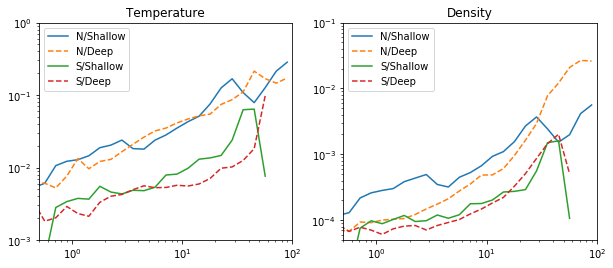

In [125]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(Xaxis, variogram_1D_temp_N_shallow, label='N/Shallow')
plt.plot(Xaxis, variogram_1D_temp_N_deep, '--', label='N/Deep')

plt.plot(Xaxis, variogram_1D_temp_S_shallow, label='S/Shallow')
plt.plot(Xaxis, variogram_1D_temp_S_deep, '--', label='S/Deep')

plt.legend()
plt.xlim([0.5, 100])
plt.ylim([0.001, 1])
plt.xscale('log')
plt.yscale('log')
plt.title('Temperature')

plt.subplot(122)
plt.plot(Xaxis, variogram_1D_dens_N_shallow, label='N/Shallow')
plt.plot(Xaxis, variogram_1D_dens_N_deep, '--', label='N/Deep')

plt.plot(Xaxis, variogram_1D_dens_S_shallow, label='S/Shallow')
plt.plot(Xaxis, variogram_1D_dens_S_deep, '--', label='S/Deep')

plt.legend()
plt.xlim([0.5, 100])
plt.ylim([0.00005, 0.1])
plt.xscale('log')
plt.yscale('log')
plt.title('Density')

### Frequency spectra 
